# Plotting Emperical Observation

The following code generates Figure 3

In [1]:
import os
os.chdir(f'{os.getcwd()}/../../')
WORKING_DIR = './evaluation/uspc'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# sns.set_theme(style="darkgrid")
from matplotlib import pyplot as plt

sns.set(color_codes=True)

In [3]:
entropy = np.load(f'{WORKING_DIR}/data/test_raw_entropy.npy')

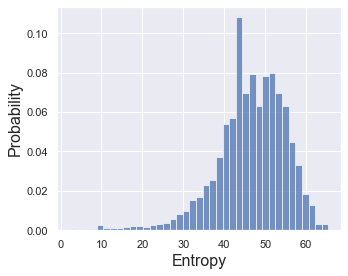

In [4]:
plt.figure(figsize=(5, 4))

ax = sns.histplot(data=entropy, stat='probability')

ax.set_xlabel('Entropy', fontsize=16)
ax.set_ylabel('Probability', fontsize=16)

plt.tight_layout()
plt.savefig(f'{WORKING_DIR}/figures/entropy_distribution.pdf')  

<Figure size 360x360 with 0 Axes>

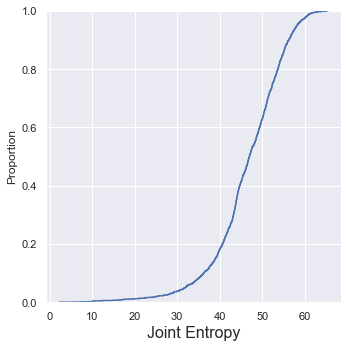

In [5]:
plt.figure(figsize=(5, 5))

ax = sns.displot(data=entropy, kind='ecdf')
ax = ax.axes.flatten()

ax[0].set_xlabel('Joint Entropy', fontsize=16)
# ax.set_ylabel('Probability', fontsize=16)

plt.tight_layout()
plt.savefig(f'{WORKING_DIR}/figures/entropy_ecdf.pdf')  

In [6]:
uniform_shc_gt = np.load(f'{WORKING_DIR}/data/uniform_shc_gt.npy')
uniform_shc_pd = np.load(f'{WORKING_DIR}/data/uniform_shc_pd.npy')

In [7]:
shc_mse = np.mean((uniform_shc_gt - uniform_shc_pd) ** 2, axis=-1)
shc_rmse = np.sqrt(shc_mse)

In [8]:
# entropy = pd.read_csv(f'{WORKING_DIR}/results/test.csv', index_col=0)
# entropy = entropy[entropy['n_points'] == 1280][['uniform']].values.reshape(-1)

In [9]:
df = pd.DataFrame.from_dict({'MSE': shc_mse, 'RMSE': shc_rmse, 'Entropy': entropy})

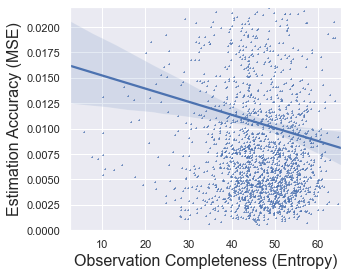

In [10]:
plt.figure(figsize=(5, 4))

ax = sns.regplot(
    x='Entropy', y='MSE', 
    order=1, data=df, marker='+', scatter_kws={'s':1})

# ax.set_xlim(0, 1)
ax.set_ylim(0, 0.022)

ax.set_xlabel('Observation Completeness (Entropy)', fontsize=16)
ax.set_ylabel('Estimation Accuracy (MSE)', fontsize=16)

plt.tight_layout()
plt.savefig(f'{WORKING_DIR}/figures/accuracy_entropy.pdf')  